In [1]:
%matplotlib inline


# Stochastic Bornhuetter Ferguson


There are several aspects of the chainladder module that are demonstrated with
this example.

1. We see how to use the `BootstrapODPSample` and `BornhuetterFerguson` to come
  up with a stochastic view of the Bornhuetter-Ferguson method.
2. We use the `broadcast_axis` method of the triangle class (new in 0.4.7)




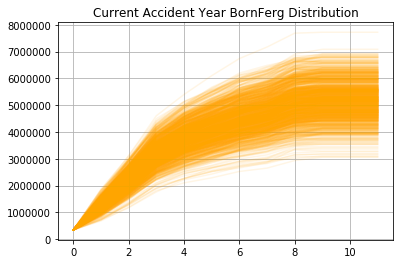

In [2]:
import chainladder as cl

# Simulation parameters
random_state = 42
n_sims = 1000

# Get data
loss = cl.load_sample('genins')
premium = loss.latest_diagonal*0+8e6

# Simulate loss triangles
sim = cl.BootstrapODPSample(random_state=random_state, n_sims=n_sims)
sim.fit(loss, sample_weight=premium)


# Fit Bornhuetter-Ferguson to stochastically generated data
model = cl.BornhuetterFerguson(0.65, apriori_sigma=0.10)
model.fit(sim.resampled_triangles_, sample_weight=premium)

# Grab completed triangle replacing simulated known data with actual known data
full_triangle = model.full_triangle_ - model.X_ + \
                loss.broadcast_axis('index', sim.resampled_triangles_.index)

# Limiting to the current year for plotting
current_year = full_triangle[full_triangle.origin==full_triangle.origin.max()].to_frame().T

# Plot the data
current_year.reset_index(drop=True).plot(
    color='orange', legend=False, alpha=0.1,
    title='Current Accident Year BornFerg Distribution', grid=True);